## Prompt Templates

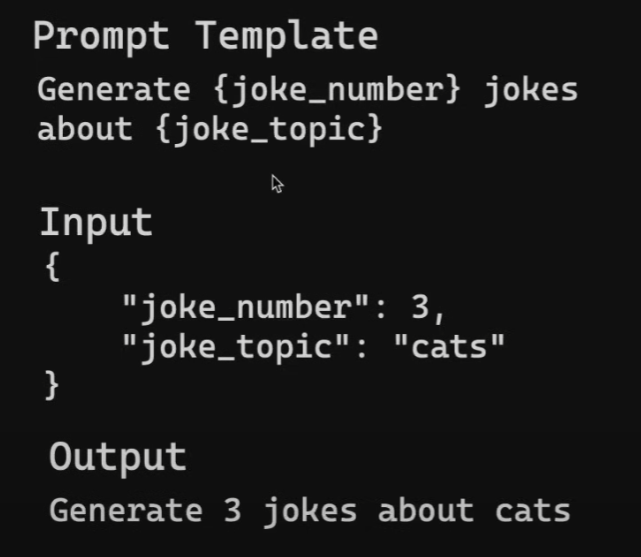

## Part 1 ChatPromptTemplate


## Part 2: LCEL
1. a series of task

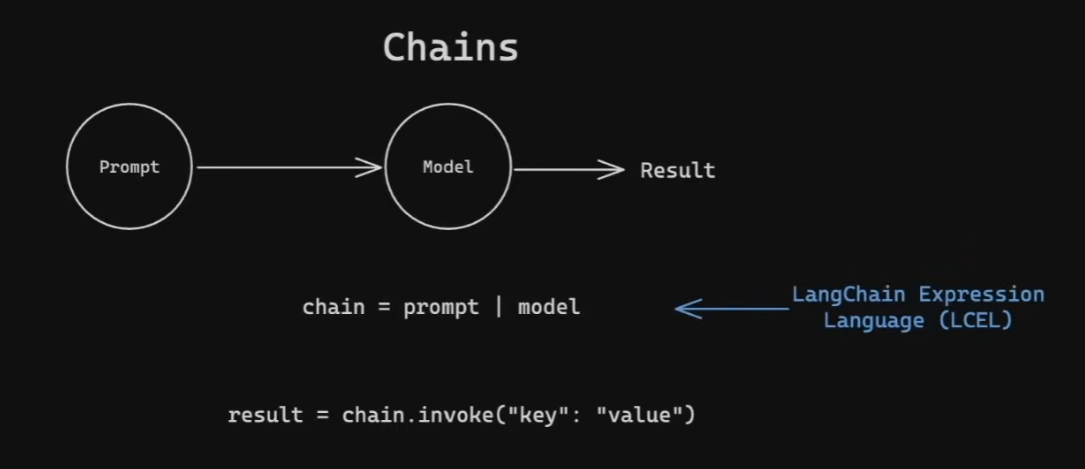

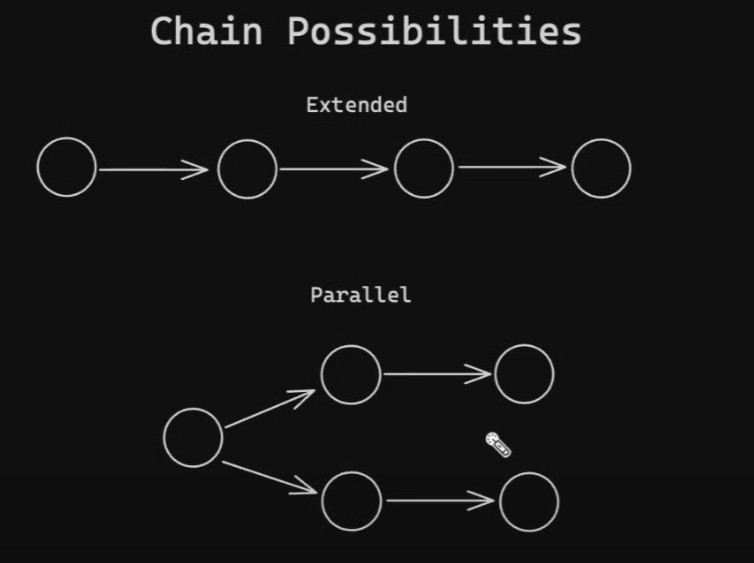
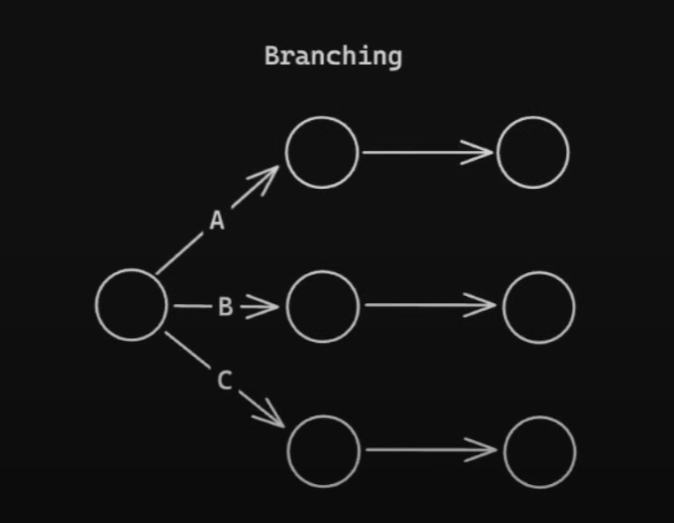

## Basic Chain

In [1]:
from langchain.chat_models import init_chat_model
import os
from dotenv import load_dotenv
load_dotenv()
llm = init_chat_model(
    model="deepseek-chat",
    model_provider="openai",
    api_key=os.environ.get('DS_API_KEY'),
    base_url="https://api.deepseek.com",
    temperature = 0.2,
)

C:\Users\sungu\AppData\Local\Temp\ipykernel_34600\2196674182.py:5: LangChainBetaWarning: The function `init_chat_model` is in beta. It is actively being worked on, so the API may change.
  llm = init_chat_model(


In [3]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a comedian who tells jokes about {topic}."),
        ("human", "Tell me {joke_count} jokes in {language}."),
    ]
)
chain = prompt_template | llm | StrOutputParser()

In [7]:
result = chain.invoke({"topic": "animals", "joke_count": 3, "language": "Chinese"})
result

'当然可以！以下是三个关于动物的中文笑话：\n\n1. **笑话一：**\n   - 问：为什么小猫不喜欢上网？\n   - 答：因为它怕被“猫”捉！\n\n2. **笑话二：**\n   - 问：大象为什么从来不参加聚会？\n   - 答：因为它怕被踩到！\n\n3. **笑话三：**\n   - 问：为什么乌龟总是带着房子？\n   - 答：因为它怕被“龟”定！\n\n希望你喜欢这些笑话！'

In [8]:
# 使用IPython展示md格式的result
from IPython.display import Markdown
Markdown(result)



当然可以！以下是三个关于动物的中文笑话：

1. **笑话一：**
   - 问：为什么小猫不喜欢上网？
   - 答：因为它怕被“猫”捉！

2. **笑话二：**
   - 问：大象为什么从来不参加聚会？
   - 答：因为它怕被踩到！

3. **笑话三：**
   - 问：为什么乌龟总是带着房子？
   - 答：因为它怕被“龟”定！

希望你喜欢这些笑话！

## Under the hood

runnablelambda: a task

runablesequence: a series of tasks -> a chain


In [10]:
from langchain.schema.runnable import RunnableLambda, RunnableSequence
# Create individual runnables (steps in the chain)
format_prompt = RunnableLambda(lambda x: prompt_template.format_prompt(**x))
invoke_model = RunnableLambda(lambda x: llm.invoke(x.to_messages()))
parse_output = RunnableLambda(lambda x: x.content)

In [11]:
# Create the RunnableSequence (equivalent to the LCEL chain)
chain = RunnableSequence(first=format_prompt, middle=[invoke_model], last=parse_output)

In [12]:
result = chain.invoke({"topic": "animals", "joke_count": 3, "language": "Chinese"})
result

'当然可以！以下是三个关于动物的中文笑话：\n\n1. **为什么小猫不喜欢上网？**  \n   因为它怕被“猫”捉到！\n\n2. **为什么大象不会用电脑？**  \n   因为它怕鼠标（老鼠）！\n\n3. **为什么小鸭子总是很快乐？**  \n   因为它每天都“嘎嘎”笑！\n\n希望你喜欢这些笑话！'

In [13]:
from IPython.display import Markdown
Markdown(result)

当然可以！以下是三个关于动物的中文笑话：

1. **为什么小猫不喜欢上网？**  
   因为它怕被“猫”捉到！

2. **为什么大象不会用电脑？**  
   因为它怕鼠标（老鼠）！

3. **为什么小鸭子总是很快乐？**  
   因为它每天都“嘎嘎”笑！

希望你喜欢这些笑话！

## Chain Extented

In [14]:
uppercase_output = RunnableLambda(lambda x: x.upper())
count_words = RunnableLambda(lambda x: f"Word count: {len(x.split())}\n{x}")

In [17]:
chain_long = chain | uppercase_output | count_words
result = chain_long.invoke({"topic": "animals", "joke_count": 3, "language": "English"})
result


"Word count: 48\nSURE, HERE ARE THREE ANIMAL JOKES FOR YOU:\n\n1. **WHY DON'T SKELETONS FIGHT EACH OTHER?**  \n   THEY DON'T HAVE THE GUTS!\n\n2. **WHAT DO YOU CALL A BEAR WITH NO TEETH?**  \n   A GUMMY BEAR!\n\n3. **WHY DID THE SCARECROW WIN AN AWARD?**  \n   BECAUSE HE WAS OUTSTANDING IN HIS FIELD!"

In [18]:
Markdown(result)

Word count: 48
SURE, HERE ARE THREE ANIMAL JOKES FOR YOU:

1. **WHY DON'T SKELETONS FIGHT EACH OTHER?**  
   THEY DON'T HAVE THE GUTS!

2. **WHAT DO YOU CALL A BEAR WITH NO TEETH?**  
   A GUMMY BEAR!

3. **WHY DID THE SCARECROW WIN AN AWARD?**  
   BECAUSE HE WAS OUTSTANDING IN HIS FIELD!

## Parallel Chain

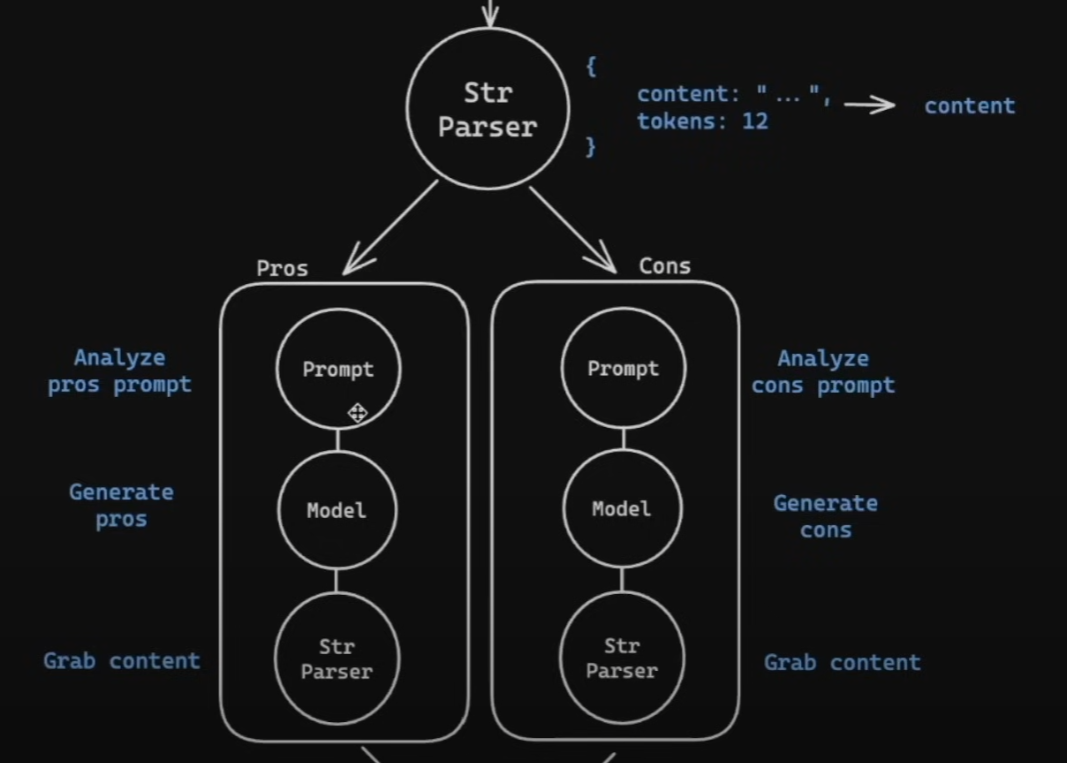

In [19]:
'''
chain = (
    prompt_template
    | model
    | StrOutputParser()
    | RunnableParallel(branches={"pros": pros_branch_chain, "cons": cons_branch_chain})
    | RunnableLambda(lambda x: combine_pros_cons(x["branches"]["pros"], x["branches"]["cons"]))
)
'''

'\nchain = (\n    prompt_template\n    | model\n    | StrOutputParser()\n    | RunnableParallel(branches={"pros": pros_branch_chain, "cons": cons_branch_chain})\n    | RunnableLambda(lambda x: combine_pros_cons(x["branches"]["pros"], x["branches"]["cons"]))\n)\n'

## Branching

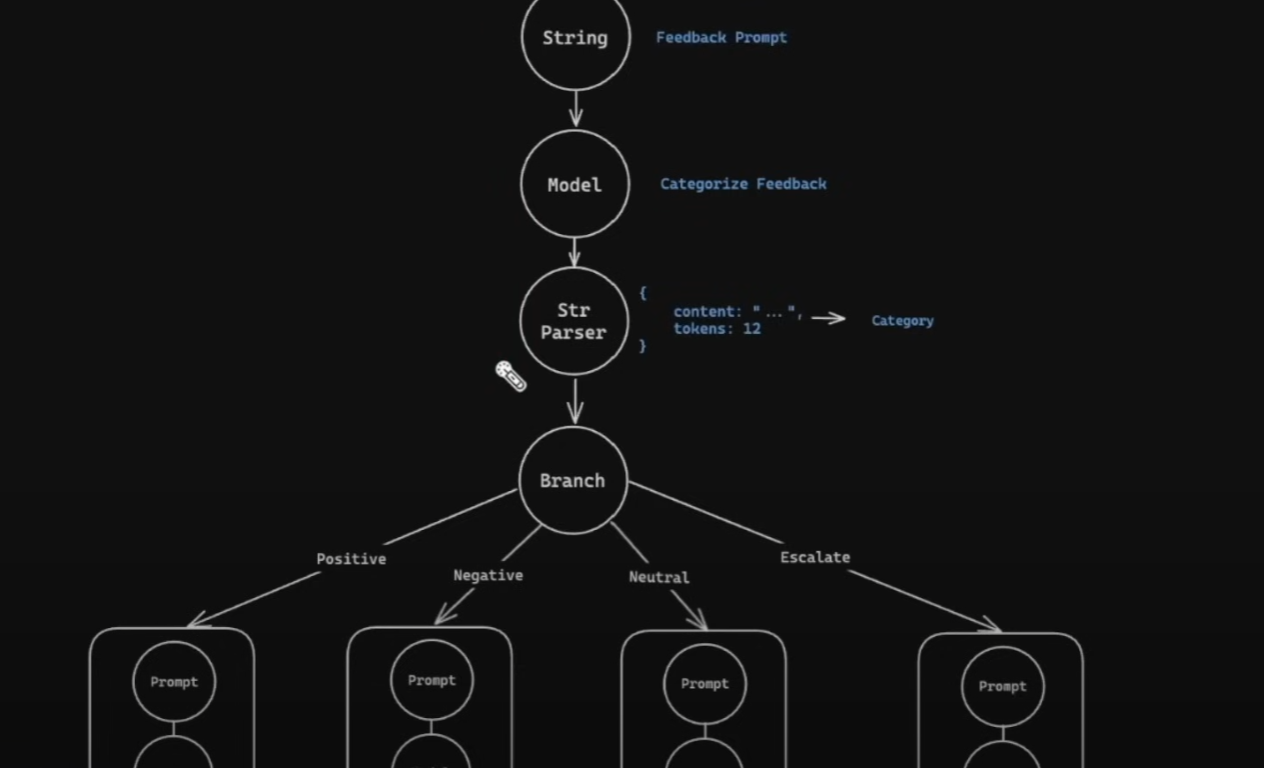

In [20]:
'''
branches = RunnableBranch(
    (
        lambda x: "positive" in x,
        positive_feedback_template | model | StrOutputParser()  # Positive feedback chain
    ),
    (
        lambda x: "negative" in x,
        negative_feedback_template | model | StrOutputParser()  # Negative feedback chain
    ),
    (
        lambda x: "neutral" in x,
        neutral_feedback_template | model | StrOutputParser()  # Neutral feedback chain
    ),
    escalate_feedback_template | model | StrOutputParser()
)
'''

'\nbranches = RunnableBranch(\n    (\n        lambda x: "positive" in x,\n        positive_feedback_template | model | StrOutputParser()  # Positive feedback chain\n    ),\n    (\n        lambda x: "negative" in x,\n        negative_feedback_template | model | StrOutputParser()  # Negative feedback chain\n    ),\n    (\n        lambda x: "neutral" in x,\n        neutral_feedback_template | model | StrOutputParser()  # Neutral feedback chain\n    ),\n    escalate_feedback_template | model | StrOutputParser()\n)\n'